In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Sembuh dari covid berkat obat A
treatment = [ 28.44,  32.32,  31.22,  29.58,  30.34,  28.76,  29.21,  30.4 ,
              31.12,  35.78,  27.58,  31.57,  30.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  31.56]

# sembuh dari covid tanpa obat A
control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]


### Hipotesis

H0 : tidak ada perbedaan signifikan antara pemberian obat A dengan tidak dalam proses penyembuhan COVID-19

H1 : ada perubahan sigifikan antara pemberian obat A 

-----

H0 : m1 = m2 : m1 - m2 = 0
H1 : m2 != m2 => m1- m2 != 0

In [31]:
# hitung ground truth
ground_truth = np.abs(np.mean(treatment) - np.mean(control))
ground_truth

3.099999999999998

In [32]:
# gabungkan data
concat = np.concatenate([treatment, control])
concat

array([28.44, 32.32, 31.22, 29.58, 30.34, 28.76, 29.21, 30.4 , 31.12,
       35.78, 27.58, 31.57, 30.73, 30.43, 30.31, 30.32, 29.18, 29.52,
       29.22, 31.56, 33.51, 30.63, 32.38, 32.52, 29.41, 30.93, 49.78,
       28.96, 35.77, 31.42, 30.76, 30.6 , 23.64, 30.54, 47.78, 31.98,
       34.52, 32.42, 31.32, 40.72])

In [33]:
diff = []
p = 100
np.random.seed(1) # reproduciable (VR46)

for i in range(p):
  np.random.shuffle(concat)
  treatment_p = concat[:20]
  control_p = concat[20:]
  d = np.abs(np.mean(treatment_p) - np.mean(control_p))
  diff.append(d)

In [38]:
d

2.370999999999988

In [34]:
diff

[0.3220000000000063,
 0.8329999999999984,
 0.3460000000000072,
 3.2249999999999943,
 0.8540000000000063,
 1.2229999999999954,
 2.4890000000000043,
 2.870999999999995,
 0.7080000000000126,
 1.6700000000000053,
 0.7380000000000031,
 1.8449999999999918,
 1.8889999999999993,
 1.4979999999999905,
 0.07599999999998985,
 0.23699999999999477,
 0.32099999999999795,
 0.42600000000000193,
 2.176000000000002,
 2.0700000000000003,
 0.5139999999999993,
 0.7779999999999987,
 0.7380000000000067,
 0.7620000000000076,
 1.1579999999999977,
 1.183000000000007,
 0.18700000000000117,
 0.9540000000000042,
 0.12199999999999633,
 0.3639999999999972,
 0.6089999999999947,
 1.460000000000008,
 2.57200000000001,
 1.7460000000000022,
 0.754999999999999,
 0.7789999999999999,
 0.17899999999999494,
 0.3910000000000018,
 3.9239999999999995,
 2.696999999999999,
 0.3569999999999993,
 0.5919999999999987,
 0.9820000000000029,
 1.01499999999999,
 0.4079999999999977,
 0.3680000000000021,
 2.1950000000000074,
 0.0310000000000

In [35]:
np.where(diff >= ground_truth)


(array([ 3, 38, 49, 55]),)

In [36]:
p_value = len(np.where(diff >= ground_truth)[0]) / p
p_value

0.04

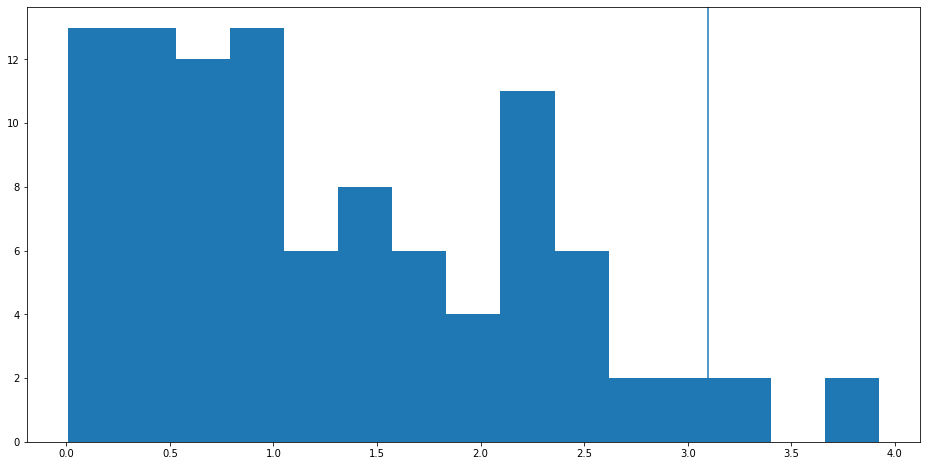

In [37]:
plt.figure(1, figsize=(16,8));
plt.hist(diff, bins=15);
plt.axvline(x=ground_truth);

ground_truth = 2.95 
p_value = 0.04 = 4%
artinya untuk selisih sebanyak 2.95 dalam 100x eksperimen sampling/permutasi terdapat 4 sample yang memenuhi kriteria (probability), dengan asumsi h0 benar


### Nomal Distribution

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [71]:
mu = 0
var = 1
def normal_pdf(mu, var):
  sigma = np.math.sqrt(var)
  x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'red');

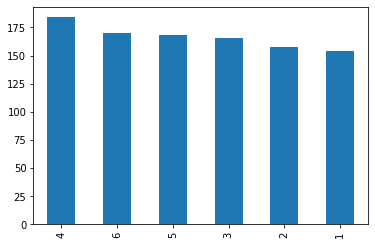

In [72]:
# permainan lempar dadu
dadu = np.random.randint(1, 7, 1000)
dadu = pd.Series(dadu)
dadu.value_counts().plot(kind='bar');

central limit theorem

In [73]:
# repitisi + rata-rata
rerata = []
for i in range(500):
  dadu = np.random.randint(1, 7, 1000)
  rerata.append(dadu.mean())

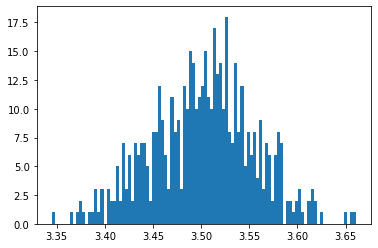

In [74]:
plt.hist(rerata, bins=100);

In [75]:
xbar = np.mean(rerata)
var = np.var(rerata)
print(xbar, var)

3.502194 0.0027973803639999993


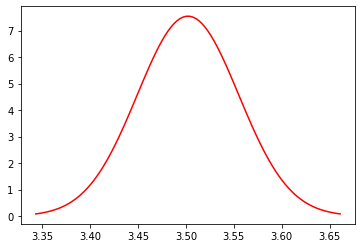

In [81]:
normal_pdf(xbar, var)

In [79]:
# normalisasi
rerata = []
for i in range(500):
  dadu = np.random.randint(1, 7, 1000)
  dadu = dadu / 6
  rerata.append(dadu.mean())